In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __init__ import *
import numpy as np
from __init__ import *
import numpy as np
from export.saver import read_pickle, read_pickle
from svg_reader import SVGReader
from helpers.helpers import filter_none
from placement.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add
from helpers.helpers import sort_and_group_objects
from domains.domain import Domain
from placement.neighbors import *
from placement.cardinal import *
from identify.id_problems import report_problems
from actions.selection import *
from helpers.layout import Layout
import plotly.io as pio
from icecream import ic

from pathlib import Path
sols = Path.cwd().parent.parent / "intermediate_solutions"

In [3]:
layout: Layout = read_pickle(sols / "1012_good_layout.pickle")
domains = layout.domains

In [4]:
plot_general(layout.domains)

In [5]:
ad_layout = adjust_domains(domains)
domains, [Gx, Gy] = ad_layout
Gxc, Gyc = create_cardinal_dags(ad_layout)


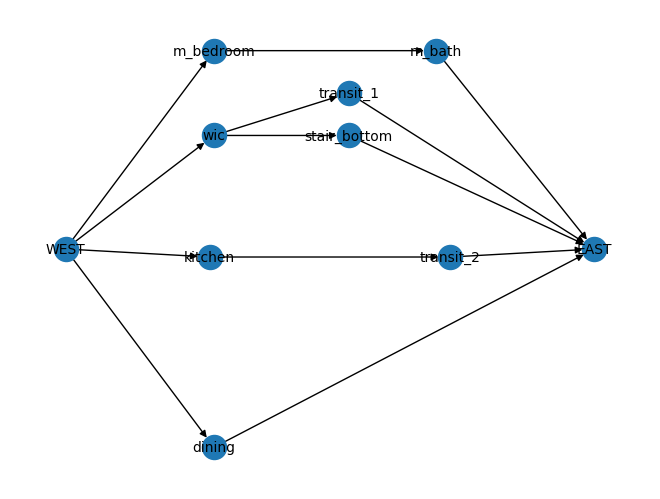

In [11]:
draw_cardinal_dags(Gxc, domains)

In [9]:
new_doms  = level_sides(layout)
new_doms

Direction.WEST 0.04
Direction.EAST 4.53
Direction.SOUTH 0.00
Direction.NORTH 11.84


{'m_bedroom': Domain(m_bedroom, x=[0.00-3.10], y=[8.42-11.84]),
 'wic': Domain(wic, x=[0.00-1.89], y=[6.62-8.42]),
 'transit_2': Domain(transit_2, x=[3.30-4.49], y=[4.04-6.62]),
 'transit_1': Domain(transit_1, x=[1.89-4.49], y=[7.52-8.42]),
 'm_bath': Domain(m_bath, x=[3.10-4.49], y=[8.42-11.84]),
 'stair_bottom': Domain(stair_bottom, x=[1.89-4.49], y=[6.62-7.52]),
 'kitchen': Domain(kitchen, x=[0.00-3.30], y=[4.04-6.62]),
 'dining': Domain(dining, x=[0.00-4.49], y=[0.00-4.04])}

In [10]:
plot_general(new_doms)

In [16]:
min([i.x.min for i in new_doms.values()])
min([i.y.min for i in new_doms.values()])

Decimal('0.00')

In [18]:
new_doms["wic"].modify(lambda i: i - 1, "x")

Domain(wic, x=[-0.96-0.93], y=[6.62-8.42])

In [7]:
Gx = layout.graphs.Gx

In [10]:
for e in Gx.edges:
    u,v = [domains[i] for i in e]
    i = u.y.line_string.intersection(v.y.line_string)  
    print(i.length)
# maybe need to put restrictions into the previous graphs.., such as we might do with holes.. 

3.33
0.8999999999999995
0.9000000000000004
2.58


In [11]:
Gxc, Gyc = create_cardinal_dags(*layout.graphs)

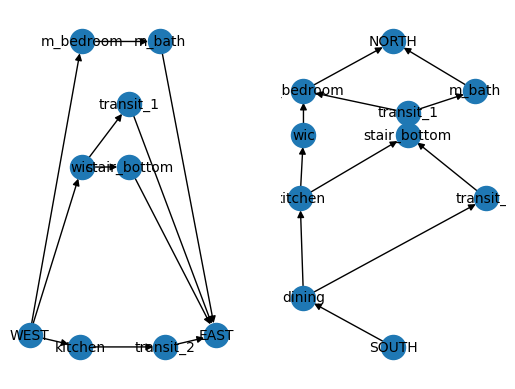

In [16]:
draw_cardinal_dags(Gxc, Gyc, domains)

In [20]:
# think about leveling sides..
# TODO update graph so that if something has no east or west nbs, it is connected to east and west.. 
w_nodes = [domains[e[1]] for e in Gxc.edges if "WEST" in e]
w_nodes

[Domain(m_bedroom, x=[0.06-3.14], y=[8.42-11.75]),
 Domain(wic, x=[0.06-1.93], y=[6.62-8.42]),
 Domain(kitchen, x=[0.00-3.34], y=[4.04-6.62])]

In [38]:
def normalize_to_target(arr):
    # log scale might be better.. 
    with localcontext() as ctx:
        ctx.prec = 3
        r_min, r_max = min(arr), max(arr)
        t_min, t_max = Decimal("0.1"), 1
        normalize = lambda x: (x-r_min)/(r_max - r_min)
        scale = lambda x: (normalize(x) * (t_max - t_min)) + t_min
        return [scale(i) for i in arr]

In [42]:
# find weighted average 



weights = normalize_to_target([i.area for i in w_nodes]) # this needs to be scaled between 0 and 1
print(weights)
vals  = [i.x.min for i in w_nodes]
val = mean([w*x for w,x in zip(weights,vals)])
val

[Decimal('1.0'), Decimal('0.100'), Decimal('0.786')]


Decimal('0.022')

In [47]:
a = 2
b = 3

tester = 9

side = "min" if tester == a  or  tester == b else "max"
print(side)

max


In [43]:
new_w_nodes = [i.x.update_side("min", val) for i in w_nodes]

In [44]:
new_w_nodes

[[0.022-3.14], [0.022-1.93], [0.022-3.34]]